In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# Reflect an existing database into a new model
Base = automap_base()

# Reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first().date
recent_date

'2017-08-23'

(array([-250.,    0.,  250.,  500.,  750., 1000., 1250., 1500., 1750.,
        2000., 2250.]),
 [Text(-250.0, 0, '2017-07-02'),
  Text(0.0, 0, '2016-08-24'),
  Text(250.0, 0, '2016-10-06'),
  Text(500.0, 0, '2016-11-17'),
  Text(750.0, 0, '2017-01-01'),
  Text(1000.0, 0, '2017-02-14'),
  Text(1250.0, 0, '2017-04-01'),
  Text(1500.0, 0, '2017-05-15'),
  Text(1750.0, 0, '2017-06-29'),
  Text(2000.0, 0, '2017-08-19'),
  Text(2250.0, 0, '')])

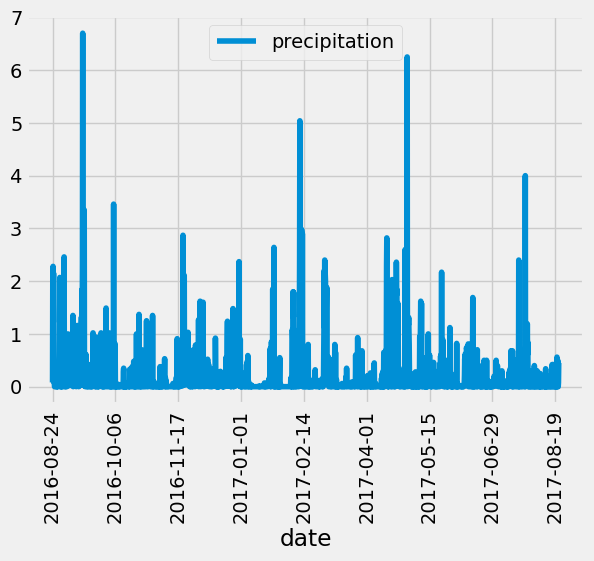

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year_ago = dt.datetime.strptime(recent_date, '%Y-%m-%d') - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
prcp_scores = session.query(Measurement.date, Measurement.prcp).\
            filter(Measurement.date >= year_ago).\
            order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_scores_db = pd.DataFrame(prcp_scores, columns=['date', 'precipitation']).set_index('date')

# Sort the dataframe by date
prcp_scores_db = prcp_scores_db.sort_index(ascending = True).dropna()

# Use Pandas Plotting with Matplotlib to plot the data
prcp_scores_db.plot()
plt.xticks(rotation=90)

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_scores_db.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [17]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(Station.station).count()
total_stations

9

In [26]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
                    group_by(Measurement.station).\
                    order_by(func.count(Measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [30]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = active_stations[0][0]

sel = [func.min(Measurement.tobs), 
       func.max(Measurement.tobs), 
       func.avg(Measurement.tobs)]

most_active_station_temperatures = session.query(*sel).\
                                   filter(Measurement.station == most_active_station).all()

print(f"The lowest temperature at {most_active_station} is {most_active_station_temperatures[0][0]} Fahrenheit.")
print(f"The highest temperature at {most_active_station} is {most_active_station_temperatures[0][1]} Fahrenheit.")
print(f"The average temperature at {most_active_station} is {round(most_active_station_temperatures[0][2], 3)} Fahrenheit.")

The lowest temperature at USC00519281 is 54.0 Fahrenheit.
The highest temperature at USC00519281 is 85.0 Fahrenheit.
The average temperature at USC00519281 is 71.664 Fahrenheit.


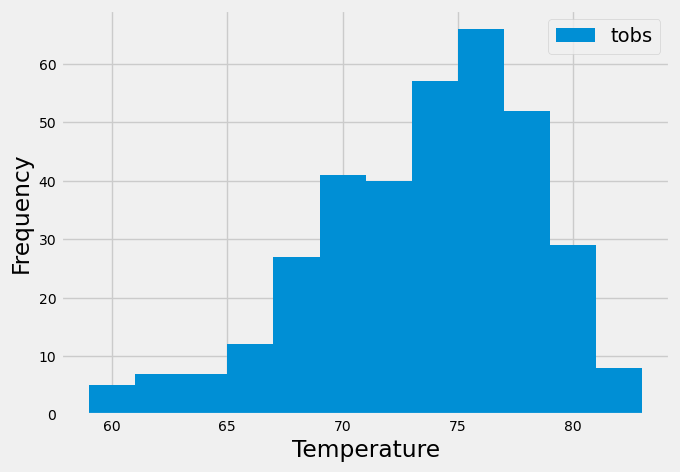

In [43]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_temp_data = session.query(Measurement.date, Measurement.station, Measurement.tobs).\
                    filter(Measurement.station == most_active_station).\
                    filter(Measurement.date >= year_ago).\
                    order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame
station_temp_db = pd.DataFrame(station_temp_data)

# Plot
station_temp_db.plot(kind='hist', bins=12, fontsize=10, figsize=(7,5))
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

# Close Session

In [ ]:
# Close Session
session.close()